# ASDSI - Social Network Analysis 2162-F23: Exercise 6

## 2023-03-13 - Lecture 11

# 1. Graph Theory

## 1.1 Adjacency matrix and edge list

### Read the edge list: Game of Thrones coappearances (Undirected)

In [1]:
# Import the stuff we need
import pandas as pd
import networkx as nx
import statistics as sts
import matplotlib.pyplot as plt
import re
from itertools import combinations

In [2]:
# open edge file, make sure to use the correct path
edges = []
with open("got_edges.csv") as file:
    # add edge, skipping the header
    for line in file.readlines()[1:]:
        source, target = line.strip().split(",")
        edges.append([int(source), int(target)])

### 1.1.1 How many nodes and links are present in the network? What is the size (in MB) of the edge list?

In [3]:
print(f"Size: {edges.__sizeof__()*10**-6:.3f}MB")

# add 1 since nodes start from 0
# careful, not robust if numbers not monotonically increasing
N = max([max(i,j) for i,j in edges])+1
print(f"Nodes: {N}")

print(f"Edges: {len(edges)}")

Size: 0.003MB
Nodes: 107
Edges: 352


### 1.1.2 Convert the edge list into an adjacency matrix in pandas. What is the size of this matrix? Have you noted any difference in size or in the number of entries to store the same information?

In [4]:
# add 1 since nodes start from 0
# assume monotonically increasing node number

adj_matr = pd.DataFrame(0, columns=range(N), index=range(N))
for i,j in edges:
    adj_matr.at[i, j] = 1
    # if directed, remove the step below
    adj_matr.at[j, i] = 1

In [5]:
print(f"Size: {adj_matr.__sizeof__()*10**-6:.3f}MB")
print(f"Rows & Columns: {adj_matr.shape}")

Size: 0.092MB
Rows & Columns: (107, 107)


### 1.1.3 Which representation, edge list or adjacency matrix, do you think should be used for storage? Which one to use for calculation? Why?

**One possible answer**  
The edge list is a better solution for storage since it only keeps the relationships that contain information (think about all the space wasted with the zeros in the Adjacency matrix, they have no information). Edge lists are intuitive, easy to read, relatively efficient and small in storage. However, the adjacency matrix is often better for computations mainly because some matrix properties provide a lot of information about the network. Problems in networks become problems in Linear Algebra, where we can profit from the vast literature, tools and methods from the field. Moreover, computations with matrices are pretty straightforward due to the enormous amount of efficient algorithms available (think about all the things you do in Pandas, that's Linear Algebra at the core, and many of those operations are Linear Transformations).

### 1.1.4 Can you spot an isolated node (i.e. a node with no links) in the adjacency matrix of a graph? How? And in the edge list of a graph? How?

In [6]:
# There are no isolated nodes since the sum of any row > 0
adj_matr[adj_matr.sum(axis=1) ==0]

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106


In [7]:
# searching isolated nodes in edge list
def find_isolated_nodes(graph, N):
    # warning: not robust, assume missing links are reported
    # Storing intermediate result
    count = 0
    # Traversing the Nodes
    for i in range(0, N):
        # Singleton component
        if (len(graph[i]) == 0):
            count += 1
    # Returning the result
    return count

In [8]:
print(find_isolated_nodes(edges, N))

0


### 1.1.5 (Optional) 
Load the edge list using the file **eu_airlines/edges.csv**.
This is a bigger network than the one from the previous exercises.
Can you think of an alternative storage of the network that is not an edge list
or matrix? For instance, if you need to know all the neighbours of a node, what
would be a good data representation?

In [9]:
def compute_neighbours(el):
    # dictionary with node neighbours
    E = dict()
    for line in el:
        i,j = line
        # process self-loop
        if i == j:
            if i in E:
                E[i].append(j)
            else:
                E[i] = [j]
            continue
        # add j to neighbours of node i
        if i in E:
            E[i].append(j)
        if i not in E:
            E[i] = [j]
    return E

In [10]:
compute_neighbours(edges)

{0: [1, 2],
 2: [82, 58, 76, 77, 1, 81, 9, 89],
 3: [4, 5, 6, 7],
 4: [26, 29, 37, 43, 52, 19, 20, 27, 54, 78, 79, 5, 51, 80, 6],
 5: [0, 29, 79, 51, 25],
 6: [26,
  38,
  103,
  105,
  52,
  99,
  19,
  53,
  81,
  83,
  27,
  100,
  84,
  54,
  11,
  47,
  39,
  55,
  79,
  5,
  24,
  56,
  51,
  57],
 7: [26, 16, 17, 19, 4, 20, 83, 100, 11, 47, 39, 55, 5, 51, 80, 6, 92, 57, 41],
 8: [9],
 9: [58, 86, 77, 89, 90, 91, 92, 93],
 10: [11],
 11: [99, 100],
 12: [13, 14, 15, 16, 17, 18, 19, 4, 20, 21, 22, 5, 23, 24, 25, 6],
 14: [13, 18, 25],
 15: [31, 32, 21, 33, 34, 35, 22, 2, 36],
 16: [40, 41],
 17: [37, 38, 52, 19, 53, 4, 20, 54, 55, 5, 24, 56, 6, 57],
 18: [25],
 19: [52, 53, 54, 11, 24],
 20: [19, 53, 83, 27, 84, 54, 85, 11, 24, 51, 80, 6],
 21: [0,
  8,
  58,
  86,
  76,
  77,
  1,
  81,
  9,
  34,
  87,
  88,
  89,
  90,
  5,
  2,
  51,
  91,
  36,
  92,
  93],
 22: [36],
 23: [37],
 24: [14, 18, 53, 54, 5, 25],
 26: [27],
 27: [84, 96],
 28: [29, 30],
 31: [32, 34],
 32: [34, 2]

### 1.1.6 (Challenging) 
Construct an edge list from non-network data, e.g. text. For this
task, use the first Chapter of Alice in wonderland **DowntheRabbitHole.txt**
and build the edge list according to the following procedure: Nodes are defined
by words, and they are linked if they appear between 2 punctuation marks, e.g.:
[. , ; ! ? etc.]. \\

In [11]:
edges_alice = []
with open("DowntheRabbitHole.txt") as file:
    # loop over paragraphs (text lines) 
    for line in file.readlines():
        # remove leading and trailing characters        
        line = line.strip()
        # split the paragraph by any of the punctuations via regex match        
        phrases_l = re.split("[.,:;?!]", line)
        # loop over each sentence after splitting
        for phrase in phrases_l:
            # remove leading and trailing characters again, mostly spaces
            words = phrase.strip().split(' ')
            if len(words) > 0:
                # make combinations of words without repetition
                # (edge) and incrment the list with results
                edges_alice += list(combinations(words, 2))
print(f"Edges: {len(edges_alice)}")

Edges: 10267


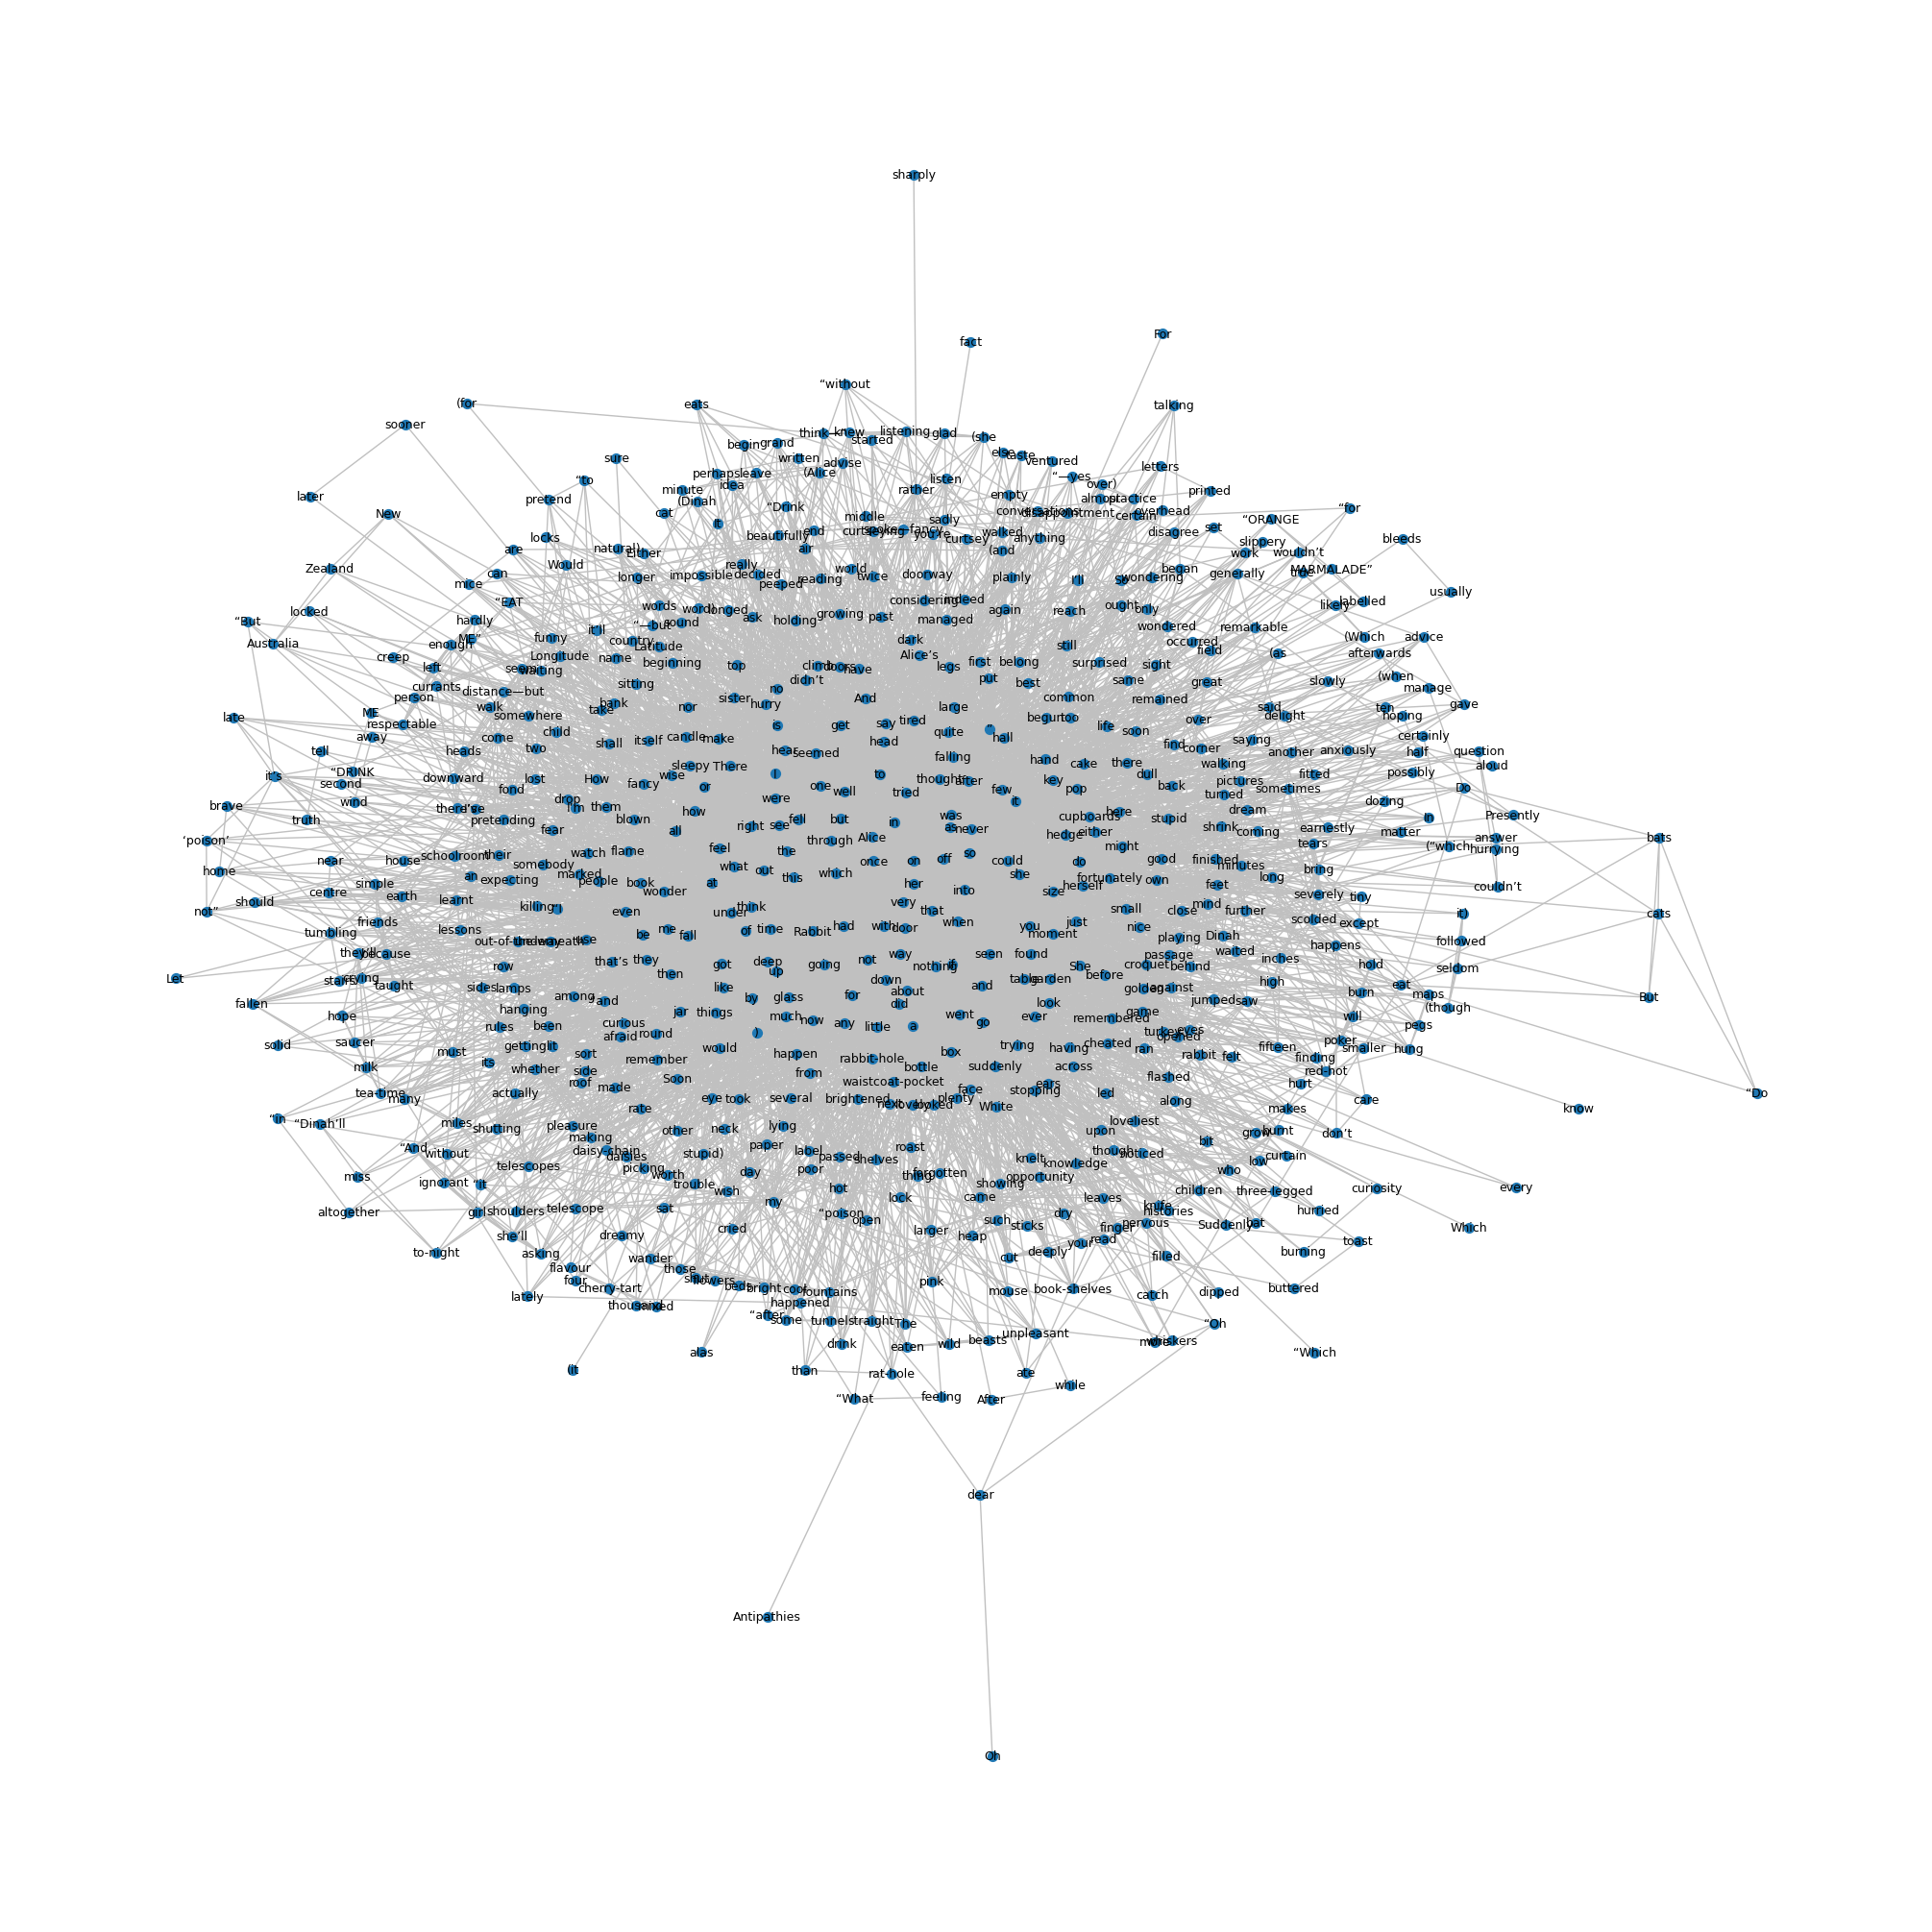

In [12]:
fig, ax = plt.subplots(figsize=(20, 20), constrained_layout=True)
G_Alice = nx.Graph()
G_Alice.add_edges_from(edges_alice)

# set up params for layout
params1 = {'font_size':9, 'with_labels':True,'node_size':50, 'font_color':'k', 'edge_color':'silver','width':1}

nx.draw(G_Alice, pos=nx.kamada_kawai_layout(G_Alice), ax=ax,**params1)
plt.show()

## 1.2 Network formation: Group discussion

Write a short paragraph, describing this discussed network. Make sure to define clearly the nodes and the links. Justify why you
choose to define nodes and links this way, and explain why you would be interested in studying this network.

Answer here:

## 1.3 Matrix multiplication


In [13]:
# change cell to markdown and add filename
# attach an image or answear here in latex
#![filename](attachment:filename.png)

$$
\begin{bmatrix}
3a & 5b & 1\\
1 & 0 & 3c \\
a & b &0
\end{bmatrix}
\begin{bmatrix}
1 \\
2  \\
0
\end{bmatrix} = ?
$$


$$
1 \begin{bmatrix}
3a \\
1 \\
a 
\end{bmatrix} +
2 \begin{bmatrix}
5b \\
0 \\
b 
\end{bmatrix} +
0 \begin{bmatrix}
1 \\
3c \\
0 
\end{bmatrix} = 
\begin{bmatrix}
3a + 10b + 0\\
1 + 0 + 0 \\
a + 2b + 0
\end{bmatrix} = 
\begin{bmatrix}
3a + 10b\\
1 \\
a + 2b
\end{bmatrix}
$$

# 2023-03-15 - Lecture 12

# 2. Network identity card


### 2.1.1 
For each network in the list below, consider its edge list and load it through the networkX module using the command nx.read_edgelist(). Then compute the measures specified in the identity card in lecture 12 and make a table. You will repeat this process for another two networks.

### (a) Game of Thrones coappearances

In [14]:
# read collaboration network as undirected graph from edge list
G_GoT = nx.read_edgelist('got_edges.csv', delimiter=",",
                                   create_using=nx.Graph())

In [15]:
# print summary of GoT network
print(f"Nodes: {nx.number_of_nodes(G_GoT)}")
print(f"Edges: {nx.number_of_edges(G_GoT)}")
print(f"Density: {nx.density(G_GoT)}")
print(f"Diameter: {nx.diameter(G_GoT)}")
print(f"Avg. Clustering: {sts.mean(nx.clustering(G_GoT).values())}")
print(f"Avg. Degree: {sts.mean([i[1] for i in nx.degree(G_GoT)])}")
print(f"Avg. Shortest Path Length: {nx.average_shortest_path_length(G_GoT)}")

Nodes: 107
Edges: 352
Density: 0.062070181625815554
Diameter: 6
Avg. Clustering: 0.551443151559996
Avg. Degree: 6.579439252336448
Avg. Shortest Path Length: 2.903897019925939


### (b) An undirected network of your choice

### 2.1.2 Which network among a and b is denser? Which one has a lower shortest path? Is it expected and why/why not?

**One possible explanation**  
In general, higher-density graphs can have shorter average path lengths, which is unsurprising since density is related to the number of edges in the network. The more edges in the network, the higher the possible paths from node $i$ to $j$. Hence, the higher the chances of having shorter paths connecting those two nodes and decreasing the average path length. The explanation above holds well for some random networks where edges are defined probabilistically, but in real networks, it depends on the process being modelled as a network. Part of the problem is that with increasingly larger networks, a lower link density is sufficient to obtain a given average path length. Generally, a larger network has a much smaller density for a given average path length than a smaller network with a similar path length.

### 2.1.3 (optional) 
Draw the two networks using different layouts algorithms available in NetworkX. See
https://networkx.org/documentation/stable/tutorial.html#drawing-graphs for examples. How changing the layout change the interpretation of the network?

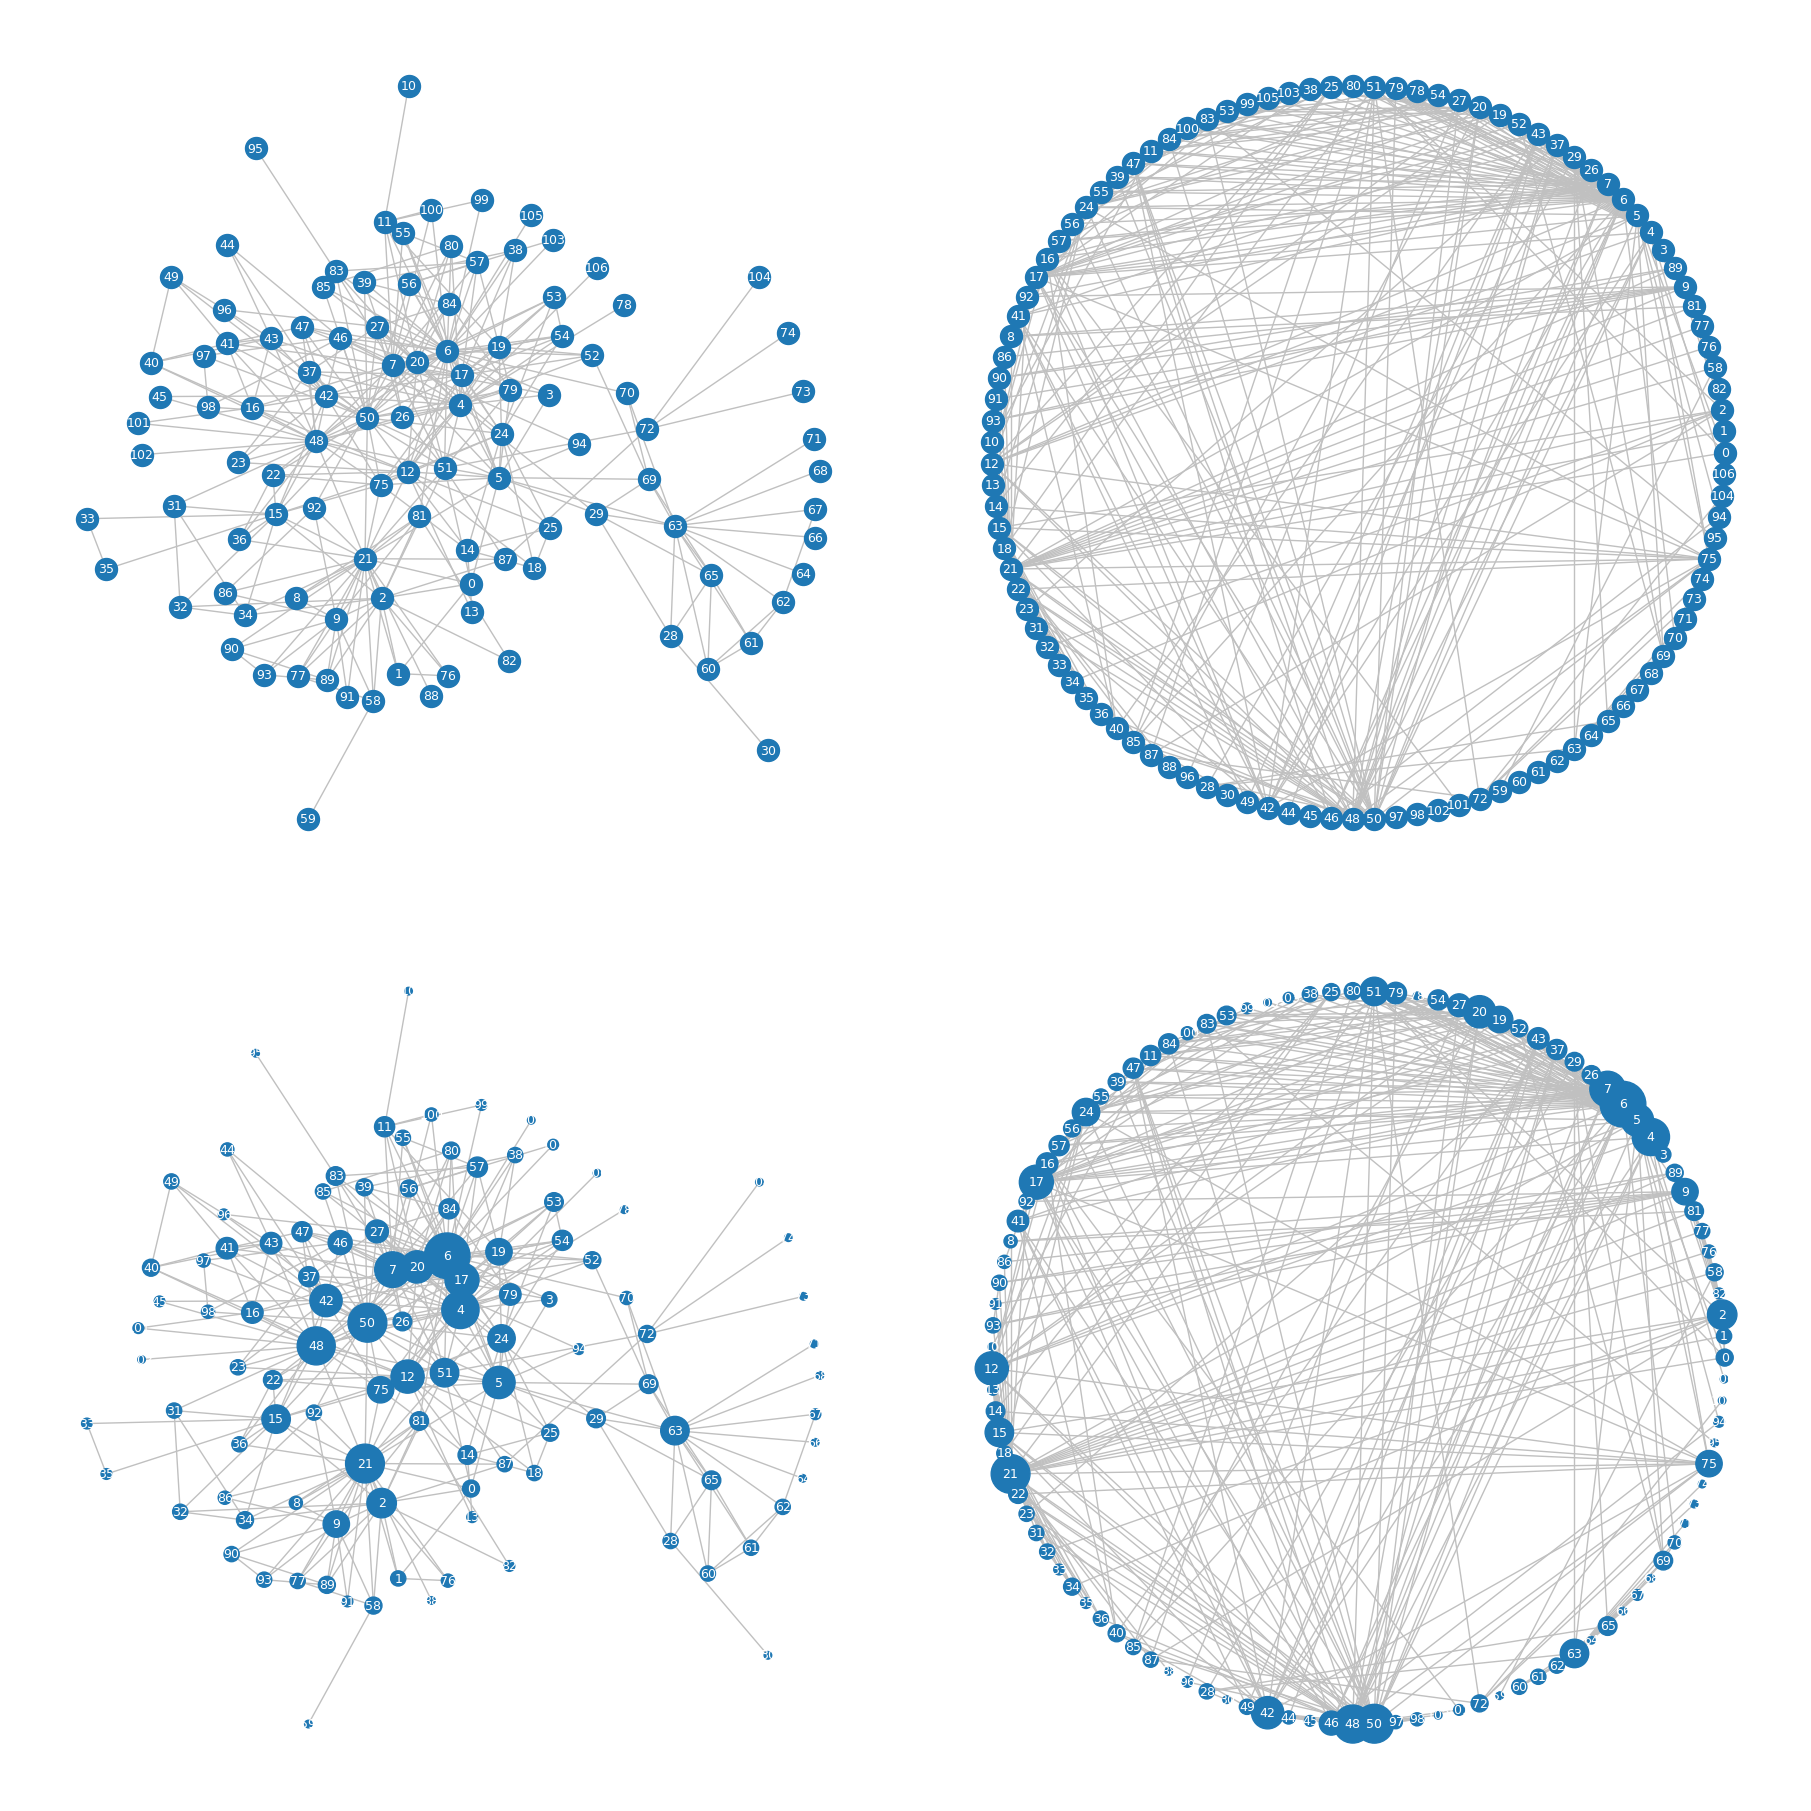

In [16]:
fig, ax = plt.subplots(2,2, figsize=(18, 18), constrained_layout=True)
ax1, ax2, ax3, ax4 = ax.flatten()

# gets the degree of nodes
d = dict(G_GoT.degree)
# set up params for layout
params1 = {'font_size':9, 'with_labels':True, 'font_color':'white', 'edge_color':'silver'}
params2 = {'node_size':[v*30 for v in d.values()], 'nodelist':d.keys(), **params1}

nx.draw(G_GoT, pos=nx.kamada_kawai_layout(G_GoT), ax=ax1, node_size=250,**params1)
nx.draw(G_GoT, pos=nx.circular_layout(G_GoT), ax=ax2, node_size=250, **params1)

nx.draw(G_GoT, pos=nx.kamada_kawai_layout(G_GoT), ax=ax3, **params2)
nx.draw(G_GoT, pos=nx.circular_layout(G_GoT), ax=ax4, **params2)
plt.show()

## 2.2 Clustering coefficient
Manually draw a connected network with five nodes, i.e., a network where there is a path
connecting any two given nodes. Label the nodes and manually calculate the
clustering coefficient of this network using the lectures' definition.

In [17]:
# change cell to markdown and add filename
#![filename](attachment:filename.png)

## 2.3 Centrality
Find the most central node in the **Game of Thrones** network according to the centrality measures presented in class.

In [18]:
GoT_degree = nx.degree_centrality(G_GoT)
GoT_eigen = nx.eigenvector_centrality(G_GoT)
GoT_between = nx.betweenness_centrality(G_GoT)

In [19]:
print(sorted(GoT_degree.items(), key=lambda x: x[1], reverse=True)[0])
print(sorted(GoT_eigen.items(), key=lambda x: x[1], reverse=True)[0])
print(sorted(GoT_between.items(), key=lambda x: x[1], reverse=True)[0])

('6', 0.33962264150943394)
('6', 0.33663766254996336)
('21', 0.22996466368473162)


### (a) Do all measures give the same node? Why, or why not?

Answer here:

### (b) What about the five most central nodes, do you obtain the same rank with different measures?

In [20]:
display('Degree:', sorted(GoT_degree.items(), key=lambda x: x[1], reverse=True)[:5])
display('Eigenvector:', sorted(GoT_eigen.items(), key=lambda x: x[1], reverse=True)[:5])
display('Betweeness:', sorted(GoT_between.items(), key=lambda x: x[1], reverse=True)[:5])

'Degree:'

[('6', 0.33962264150943394),
 ('21', 0.24528301886792453),
 ('50', 0.24528301886792453),
 ('48', 0.2358490566037736),
 ('4', 0.22641509433962265)]

'Eigenvector:'

[('6', 0.33663766254996336),
 ('50', 0.278781888166022),
 ('4', 0.2736630365317281),
 ('17', 0.24644869607730568),
 ('48', 0.24484547615579855)]

'Betweeness:'

[('21', 0.22996466368473162),
 ('5', 0.20945238402931926),
 ('6', 0.1979128432027736),
 ('63', 0.15720345212054962),
 ('48', 0.12696447138301512)]

Curious about who is behind those numbers? Go check the **got_nodes** file.